In [ ]:
import numpy as np
import pandas as pd 
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity

C:\Users\chris\anaconda4\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\chris\anaconda4\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
C:\Users\chris\anaconda4\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [ ]:
restaurants = pd.read_csv('restaurants.csv')
ratings = pd.read_csv('ratings.csv')
df = restaurants.merge(ratings, how="left", on="RestaurantId")
df.head()

,RestaurantId,Name,UserId,Review,Rating
0,1,aleria,1,A full 5 stars! Phenomenal Michelin ranked res...,5
1,1,aleria,2,We spent great evening here. Cozy restaurant w...,5
2,1,aleria,3,10/10. Aleria was our highlight during our tri...,5
3,1,aleria,4,Great service and fantastic food. We enjoyed e...,5
4,1,aleria,5,Let me put it his way: simply perfect. We hate...,5


In [ ]:
del df['Review']
del df['RestaurantId']
df

,Name,UserId,Rating
0,aleria,1,5
1,aleria,2,5
2,aleria,3,5
3,aleria,4,5
4,aleria,5,5
...,...,...,...
26203,ydria,1000,5
26204,ydria,1001,5
26205,ydria,1002,4
26206,ydria,1003,5


In [ ]:
restaurants.head()

,RestaurantId,Name
0,1,aleria
1,2,alexander_the_great
2,3,arcadia
3,4,athenascook
4,5,atitamos


In [ ]:
ratings.head()

,UserId,RestaurantId,Review,Rating
0,1,1,A full 5 stars! Phenomenal Michelin ranked res...,5
1,1,22,Great dishes for sharing. Get the lamb also. ...,5
2,1,21,We had the lamb and souvlaki and both were so ...,5
3,1,25,"Strofi is located right near the Acropolis, an...",3
4,1,2,Excellent food and service. \n\nI have been co...,5


In [ ]:
print('Number of Users: {},\nNumber of restaurants: {}'  .format(len(df.UserId.unique()),len(df.Name.unique())))

Number of Users: 1005,
Number of restaurants: 30


In [ ]:
df.isnull().sum()

Name      0
UserId    0
Rating    0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26208 entries, 0 to 26207
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    26208 non-null  object
 1   UserId  26208 non-null  int64 
 2   Rating  26208 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 819.0+ KB


In [ ]:
restaurant_rating_avg = df.groupby('Name')['Rating'].mean().sort_values(ascending=False).reset_index().rename(columns={'Rating':'Average_rating'})
restaurant_rating_avg.head()

,Name,Average_rating
0,liondi,4.837811
1,maiandros,4.816915
2,aleria,4.810384
3,karamanlidika,4.792040
4,lithos,4.791045


In [ ]:
restaurant_rating_count =df.groupby('Name')['Rating'].count().sort_values(ascending =False).reset_index().rename(columns={'Rating':'Total_Rating_Count'})
restaurant_rating_count

,Name,Total_Rating_Count
0,karamanlidika,1005
1,gods_restaurant,1005
2,o_thanasis,1005
3,smile,1005
4,strofi,1005
5,maiandros,1005
6,lithos,1005
7,liondi,1005
8,oroscopo,1005
9,efcharis,1005


In [ ]:
df

,Name,UserId,Rating
0,aleria,1,5
1,aleria,2,5
2,aleria,3,5
3,aleria,4,5
4,aleria,5,5
...,...,...,...
26203,ydria,1000,5
26204,ydria,1001,5
26205,ydria,1002,4
26206,ydria,1003,5


In [ ]:
Rating_prod = df.groupby('Name')['Rating'].mean()
Rating_prod.head()

Name
aleria                 4.810384
alexander_the_great    4.537425
arcadia                4.722388
athenascook            4.670426
atitamos               4.790111
Name: Rating, dtype: float64

C:\Users\chris\anaconda4\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Rating', ylabel='Density'>

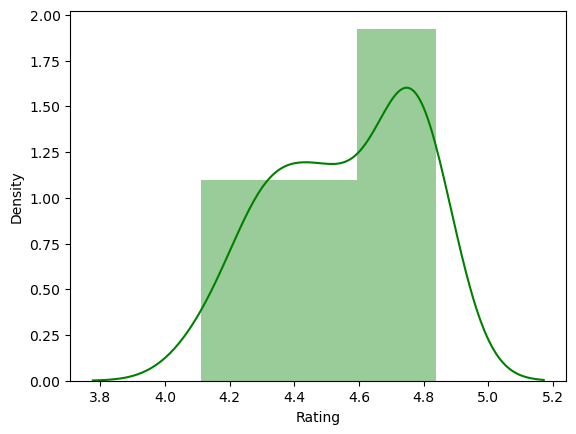

In [ ]:
sns.distplot(Rating_prod, color="green", kde=True)

In [ ]:
# περιστρέφουμε τον πίνακα ώστε οι στήλες να είναι τα εστιατόρια, και κάθε γραμμή αφορά ένα χρήστη
restaurant_ratings_matrix= df.pivot_table(columns='Name',index='UserId',values='Rating').fillna(0)

In [ ]:
restaurant_ratings_matrix

Name,aleria,alexander_the_great,arcadia,athenascook,atitamos,balcony,dio_dekares,efcharis,elaea,gods_restaurant,...,rozalia,scholarchio,sin_athina,smile,strofi,the_greco,to_kati_allo,to_paradosiako,tzitzikas_kai_mermigas,ydria
UserId,,,,,,,,,,,,,,,,,,,,,
1,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,...,5.0,5.0,1.0,5.0,3.0,4.0,4.0,5.0,5.0,4.0
2,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,...,5.0,5.0,5.0,4.0,5.0,5.0,2.0,5.0,4.0,5.0
3,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,...,5.0,4.0,1.0,5.0,5.0,5.0,5.0,5.0,4.0,1.0
4,5.0,3.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,...,4.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,3.0
5,5.0,5.0,3.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,...,5.0,5.0,5.0,4.0,5.0,5.0,5.0,5.0,4.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1001,0.0,0.0,5.0,0.0,0.0,0.0,0.0,5.0,0.0,5.0,...,0.0,0.0,0.0,5.0,5.0,0.0,5.0,0.0,0.0,5.0
1002,0.0,0.0,5.0,0.0,0.0,0.0,0.0,5.0,0.0,5.0,...,0.0,0.0,0.0,3.0,5.0,0.0,5.0,0.0,0.0,4.0
1003,0.0,0.0,5.0,0.0,0.0,0.0,0.0,5.0,0.0,5.0,...,0.0,0.0,0.0,5.0,5.0,0.0,5.0,0.0,0.0,5.0


In [ ]:
restaurant_ratings_matrix.shape

(1005, 30)

In [ ]:
X = restaurant_ratings_matrix.T
X.head()

UserId,1,2,3,4,5,6,7,8,9,10,...,996,997,998,999,1000,1001,1002,1003,1004,1005
Name,,,,,,,,,,,,,,,,,,,,,
aleria,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
alexander_the_great,5.0,5.0,5.0,3.0,5.0,4.0,5.0,3.0,5.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
arcadia,5.0,5.0,5.0,5.0,3.0,5.0,4.0,5.0,5.0,5.0,...,5.0,5.0,5.0,5.0,2.0,5.0,5.0,5.0,4.0,5.0
athenascook,5.0,5.0,5.0,5.0,5.0,5.0,5.0,3.0,5.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
atitamos,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X.shape

(30, 1005)

In [ ]:
X1 = X

In [ ]:
# απόσπαση SVD πίνακα
from sklearn.decomposition import TruncatedSVD
SVD = TruncatedSVD(n_components=5)
decomposed_matrix = SVD.fit_transform(X)
decomposed_matrix.shape

(30, 5)

In [ ]:
# Correlation πίνακας
correlation_matrix = np.corrcoef(decomposed_matrix)
correlation_matrix.shape

(30, 30)

In [ ]:
X.index[29]

'ydria'

In [ ]:
i = "ydria"

restaurant_names = list(X.index)
restaurant_ID = product_names.index(i)
restaurant_ID

29

In [ ]:
correlation_restaurant_ID = correlation_matrix[restaurant_ID]
correlation_restaurant_ID.shape

(30,)

In [ ]:
Recommend = list(X.index[correlation_restaurant_ID > 0.65])

# διαγραφεί του αρχικού εστιατόριου
Recommend.remove(i) 

Recommend[0:5]

['aleria', 'alexander_the_great', 'arcadia', 'athenascook', 'atitamos']